In [1]:
import numpy as np
import os
from nexusformat import nexus
from ipyfilechooser import FileChooser
from hdr_import import HDRFile
from matplotlib.colors import LogNorm
from scipy.ndimage import fourier_shift
import skimage
from skimage.registration import phase_cross_correlation
from functions import clean_images, import_images, plot_stack, align_images, i_bg_mean, plot_stack_roi, get_roi_intensities, line_intensity, ROIs_select, Nexus_File_Save
import matplotlib.pyplot as plt
%matplotlib widget
from IPython.display import display, clear_output
from ipywidgets import widgets
import cv2

cleaned_images, aligned_images = [], []

ImportError: cannot import name 'FileChooser' from 'ipyfilechooser' (unknown location)

<h3>Choose file path</h3>
Run the following cell and choose the folder path to the STXM energy stack.

In [5]:
from ipyfilechooser import FileChooser
#file_path = '/data/visitors/softimax/Greco/'# enter the partial path to the data for faster navigation
#file_path = '/data/visitors/softimax/20221193'
file_path = 'C:\\Users\\softimax-user\\Documents\\Python Scripts\\sample_data\\'
fc = FileChooser()
display(fc)

FileChooser(path='/mnt/c/Users/softimax-user/Documents/Python Scripts', filename='', title='', show_hidden=Fal…

<h3>Import the data</h3>
Run the following cell to import the data from the chosen path and store it into numpy arrays

Reading hdr file: /mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069.hdr
Reading xim file(s):
/mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069_a000.xim
/mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069_a001.xim
/mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069_a002.xim
/mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069_a003.xim
/mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069_a004.xim
/mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069_a005.xim
/mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069_a006.xim
/mnt/c/Users/softimax-user/Documents/Python Scripts/sample_data/Max_231210069/Max_231210069_a007.xim
/mnt/c/Users/softimax-user/Documents/Python Scripts/sampl

interactive(children=(IntSlider(value=0, description='im_number', max=56), Output()), _dom_classes=('widget-in…

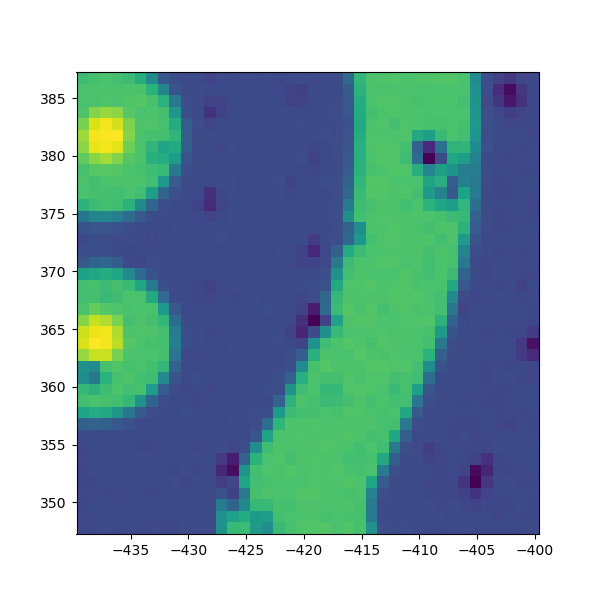

In [8]:
img_array, extent, energy, sample_hdr = import_images(fc)
plot_stack(img_array, extent)
cleaned_images, aligned_images = [], []

In [9]:
sample_hdr.hdr_content_raw

'\nScanDefinition = { Label = "Max_231210069.hdr"; Type = "NEXAFS Image Scan"; Flags = "Image Stack"; Dwell = 5;\n\tRegions = (1,\n{\n\t\t\tPAxis = { Name = "Sample X"; Unit = "um"; Min = -439.6804; Max = -399.6804; Dir = 1;\n\t\t\t\tPoints = (40, -439.6804, -438.6804, -437.6804, -436.6804, -435.6804, -434.6804, -433.6804, -432.6804, -431.6804, -430.6804, -429.6804, -428.6804, -427.6804, -426.6804, -425.6804, -424.6804, -423.6804, -422.6804, -421.6804, -420.6804, -419.6804, -418.6804, -417.6804, -416.6804, -415.6804, -414.6804, -413.6804, -412.6804, -411.6804, -410.6804, -409.6804, -408.6804, -407.6804, -406.6804, -405.6804, -404.6804, -403.6804, -402.6804, -401.6804, -400.6804);\n};\n\n\t\t\tQAxis = { Name = "Sample Y"; Unit = "um"; Min = 347.269; Max = 387.269; Dir = 1;\n\t\t\t\tPoints = (40, 347.2690, 348.2690, 349.2690, 350.2690, 351.2690, 352.2690, 353.2690, 354.2690, 355.2690, 356.2690, 357.2690, 358.2690, 359.2690, 360.2690, 361.2690, 362.2690, 363.2690, 364.2690, 365.2690, 366.

In [10]:
sample_hdr.parsing_result.asDict

<bound method ParseResults.as_dict of ParseResults([ParseResults(['ScanDefinition', '=', '{', ParseResults(['Label', 'Max_231210069.hdr'], {}), ParseResults(['Type', 'NEXAFS Image Scan'], {}), ParseResults(['Flags', 'Image Stack'], {}), ParseResults(['Dwell', '5'], {}), ParseResults(['Regions', ParseResults(['1', ParseResults(['PAxis', '=', '{', ParseResults(['Name', 'Sample X'], {}), ParseResults(['Unit', 'um'], {}), ParseResults(['Min', '-439.6804'], {}), ParseResults(['Max', '-399.6804'], {}), ParseResults(['Dir', '1'], {}), ParseResults(['Points', 40.0, -439.6804, -438.6804, -437.6804, -436.6804, -435.6804, -434.6804, -433.6804, -432.6804, -431.6804, -430.6804, -429.6804, -428.6804, -427.6804, -426.6804, -425.6804, -424.6804, -423.6804, -422.6804, -421.6804, -420.6804, -419.6804, -418.6804, -417.6804, -416.6804, -415.6804, -414.6804, -413.6804, -412.6804, -411.6804, -410.6804, -409.6804, -408.6804, -407.6804, -406.6804, -405.6804, -404.6804, -403.6804, -402.6804, -401.6804, -400.68

In [11]:
sample_hdr.as_dict

{'ScanDefinition': {'Label': 'Max_231210069.hdr',
  'Type': 'NEXAFS Image Scan',
  'Flags': 'Image Stack',
  'Dwell': 5,
  'Regions': {'1': {'PAxis': {'Name': 'Sample X',
     'Unit': 'um',
     'Min': -439.6804,
     'Max': -399.6804,
     'Dir': 1,
     'Points': [40.0,
      -439.6804,
      -438.6804,
      -437.6804,
      -436.6804,
      -435.6804,
      -434.6804,
      -433.6804,
      -432.6804,
      -431.6804,
      -430.6804,
      -429.6804,
      -428.6804,
      -427.6804,
      -426.6804,
      -425.6804,
      -424.6804,
      -423.6804,
      -422.6804,
      -421.6804,
      -420.6804,
      -419.6804,
      -418.6804,
      -417.6804,
      -416.6804,
      -415.6804,
      -414.6804,
      -413.6804,
      -412.6804,
      -411.6804,
      -410.6804,
      -409.6804,
      -408.6804,
      -407.6804,
      -406.6804,
      -405.6804,
      -404.6804,
      -403.6804,
      -402.6804,
      -401.6804,
      -400.6804]},
    'QAxis': {'Name': 'Sample Y',
     'Unit'

<h3>Remove image artifacts</h3>
Run the following cell to remove hot/dead pixels or line artifacts in the images. If there are no artifacts, you do not need to run the cell. You can uncomment the 'plot_stack' line to view the result.

In [ ]:
cleaned_images = clean_images(img_array)
plot_stack(cleaned_images, extent)
aligned_images = []

<h3>Align images</h3>
Run the following cell to align the images. You can uncomment the 'plot_stack' line to view the result.

In [ ]:
# if you want the images aligned one after the other set to True. Otherwise, to align the stack with respect to the first image, set to False.
sequential = True
# the smaller, the finer the alignment. Usual values (0.001, 0.005)
shift_parameter = 0.3
# the smaller, the faster...
upsample_parameter = 500

if len(cleaned_images) == 0:
    aligned_images = align_images(img_array,sequential, shift_parameter,upsample_parameter)
else:
    aligned_images = align_images(cleaned_images,sequential,shift_parameter,upsample_parameter)
plot_stack(aligned_images, extent)

<h3>Select ROI</h3>
Start by choosing an image number from the stack ('im_number') and run the cell. On the image, choose the points for a ROI by left-clicking in the relevant locations. Once happy with the ROI, click on either 'Intensity ROI' or 'Background ROI'. If you made a mistake selecting the ROI, just click one of the aforementioned buttons and start selecting a new ROI. If you want to select multiple intensity ROIs: select one ROI and click 'Append I ROI', select another ROI and click 'Append I ROI' and so on... Once happy with all ROIs, click 'Intensity ROI' and an average of all selected ROIs will be plotted. To save the resulting spectrum to a .txt file, please type a name for the file and click 'Save spectrum to .txt'.

In [ ]:
# the image number in the stack to select the ROIs from (the script will go through the whole stack)
im_number = 10

# Optional min and max contrast values, set one to None for default values
vmin = None
vmax = 100

# automatic image stack selection
img1 = np.array(img_array[im_number], dtype='float64')
if vmin == None or vmax == None:
    vmin = np.min(img1)
    vmax = np.max(img1)    
if len(cleaned_images) == 0 and len(aligned_images) == 0:
    ROIs_select(img1, vmin, vmax, img_array, energy, fc)
elif len(cleaned_images) != 0 and len(aligned_images) == 0:
    ROIs_select(img1, vmin, vmax, cleaned_images, energy, fc)
elif len(cleaned_images) == 0 and len(aligned_images) != 0 or len(cleaned_images) != 0 and len(aligned_images) != 0:
    ROIs_select(img1, vmin, vmax, aligned_images, energy, fc)


<h3>Plot line intensity</h3>
Select an image number and draw a line to plot the pixel intensity.

In [ ]:
# the image number in the stack to plot the line intensity
im_number = 10

# automatic image stack selection
if len(cleaned_images) == 0 and len(aligned_images) == 0:
    img1 = np.array(img_array[im_number], dtype='float64')
elif len(cleaned_images) != 0 and len(aligned_images) == 0:
    img1 = np.array(cleaned_images[im_number], dtype='float64')
elif len(cleaned_images) == 0 and len(aligned_images) != 0 or len(cleaned_images) != 0 and len(aligned_images) != 0:
    img1 = np.array(aligned_images[im_number], dtype='float64')
    
line_intensity(img1, extent)

<h3>Save NEXUS/TIF stack</h3>

In [ ]:
'''if len(cleaned_images) == 0 and len(aligned_images) == 0:
    Nexus_File_Save(img_array, sample_hdr, fc)
elif len(cleaned_images) != 0 and len(aligned_images) == 0:
    Nexus_File_Save(cleaned_images, sample_hdr, fc)
elif len(cleaned_images) == 0 and len(aligned_images) != 0 or len(cleaned_images) != 0 and len(aligned_images) != 0:
    Nexus_File_Save(aligned_images, sample_hdr, fc)'''